In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

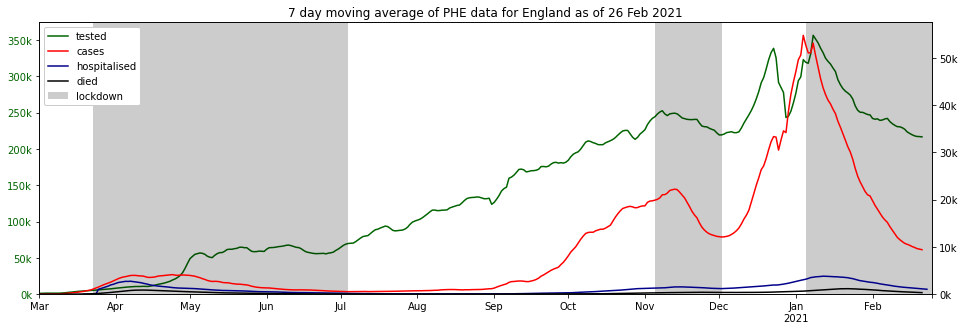

In [2]:
plot_summary(earliest_date='2020-03-01')

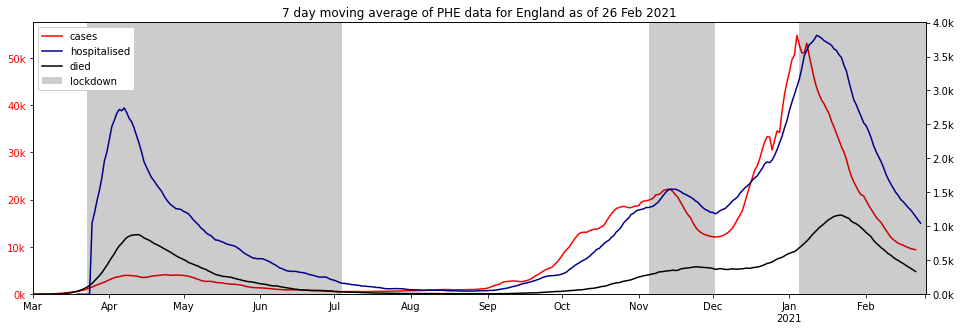

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,558737.0,16227104.0,15668367.0,56286961,0.992658,27.836584,71.170758
1,Northern Ireland,N92000002,31898.0,505188.0,473290.0,1893667,1.684457,24.993307,73.322237
2,Scotland,S92000003,65340.0,1542929.0,1477589.0,5463300,1.195980,27.045723,71.758296
3,Wales,W92000004,80062.0,902334.0,822272.0,3152879,2.539330,26.080037,71.380633


'partial: 19,177,555'

'full: 736,037'

66796807

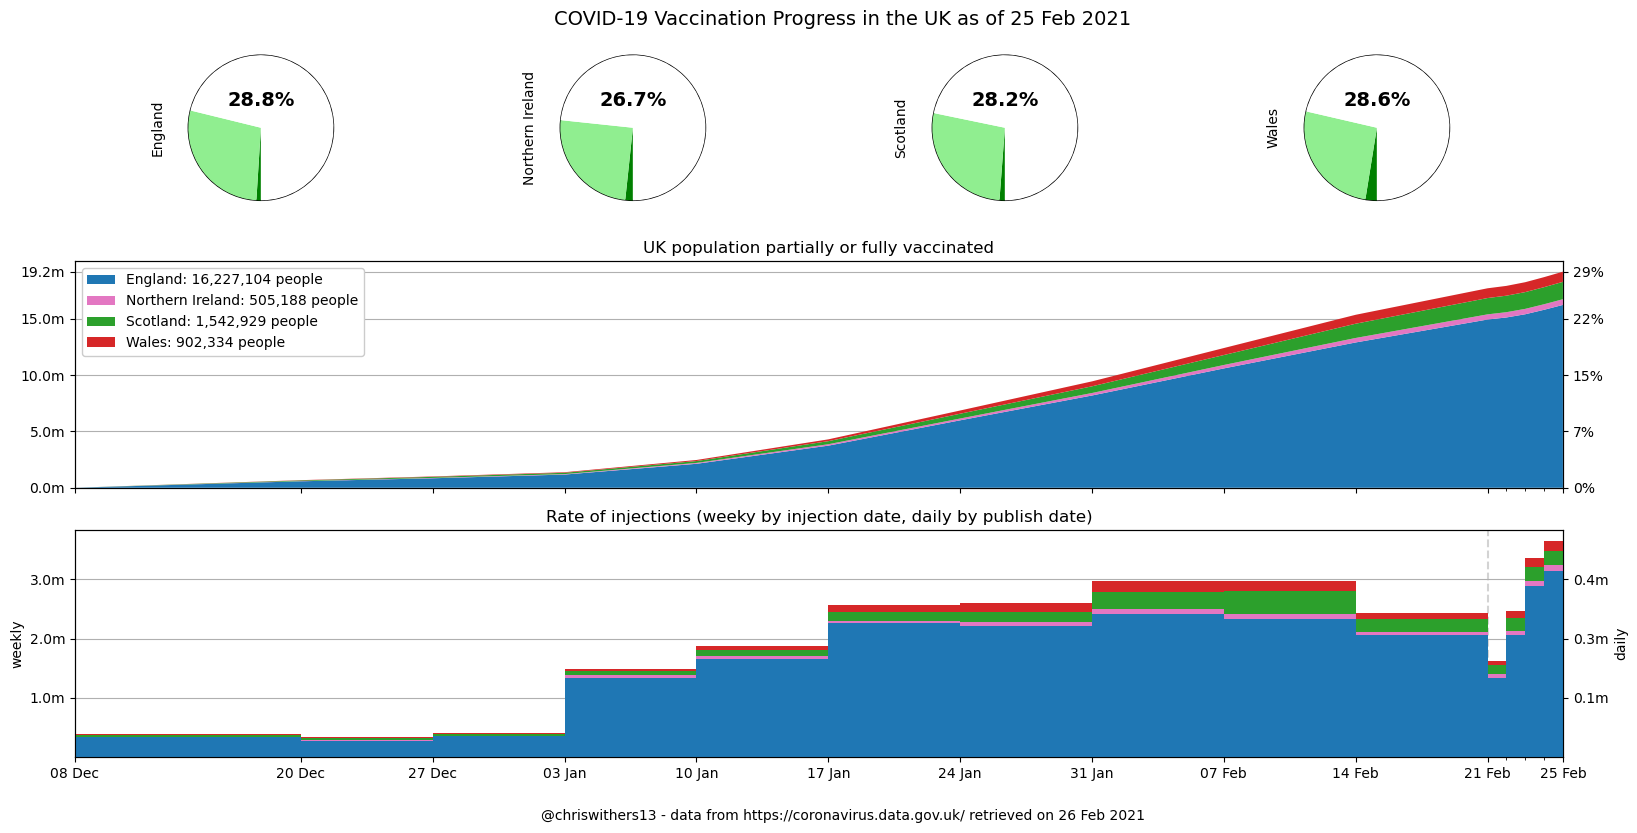

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [5]:
vaccination_changes()

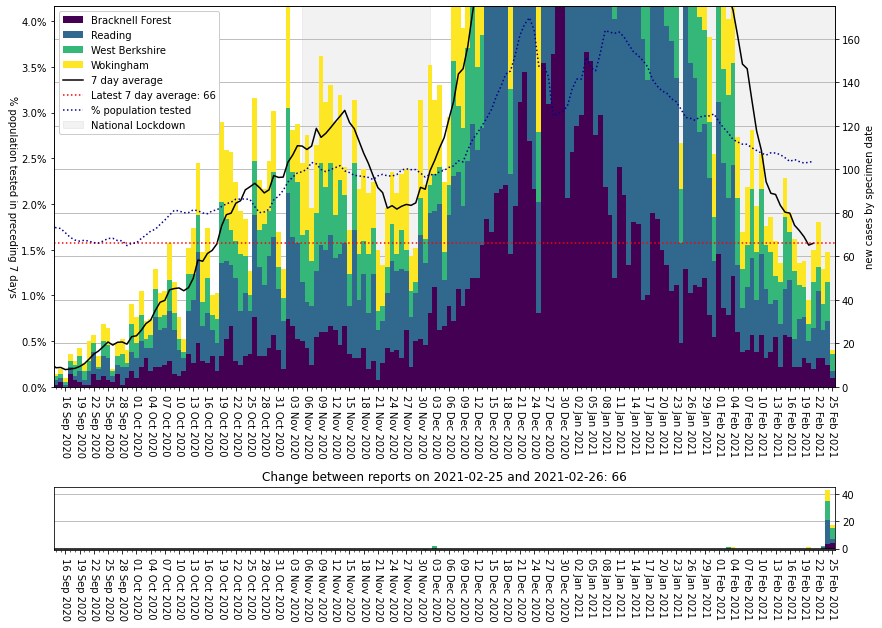

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

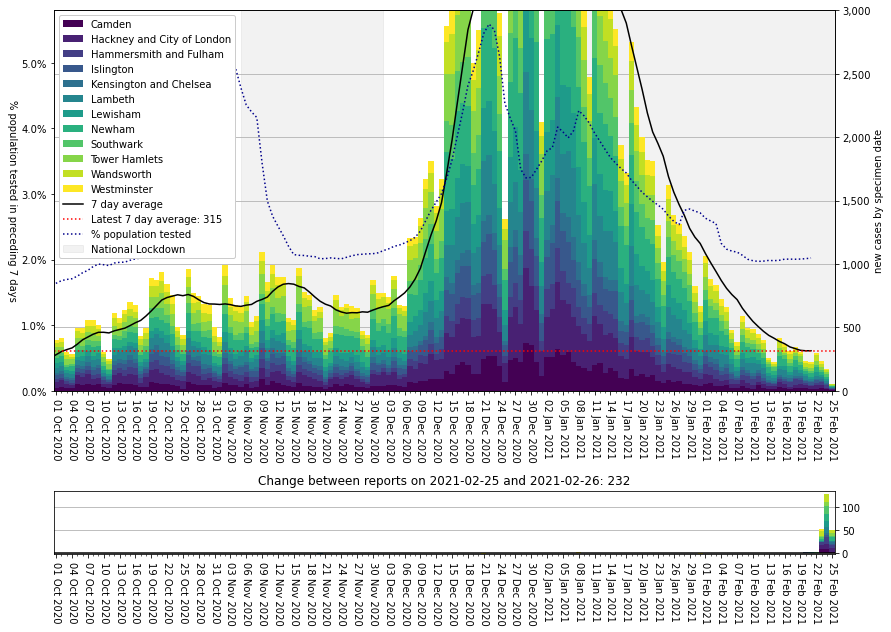

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,245.091251,177.0,2021-02-25
E07000010,Fenland,199.312715,203.0,2021-02-25
E06000016,Leicester,191.122002,677.0,2021-02-25
E06000031,Peterborough,182.933763,370.0,2021-02-25
E07000174,Mansfield,180.216443,197.0,2021-02-25
E07000140,South Holland,175.754323,167.0,2021-02-25
S12000014,Falkirk,174.653490,281.0,2021-02-25
E07000134,North West Leicestershire,172.761579,179.0,2021-02-25
E08000028,Sandwell,172.020094,565.0,2021-02-25


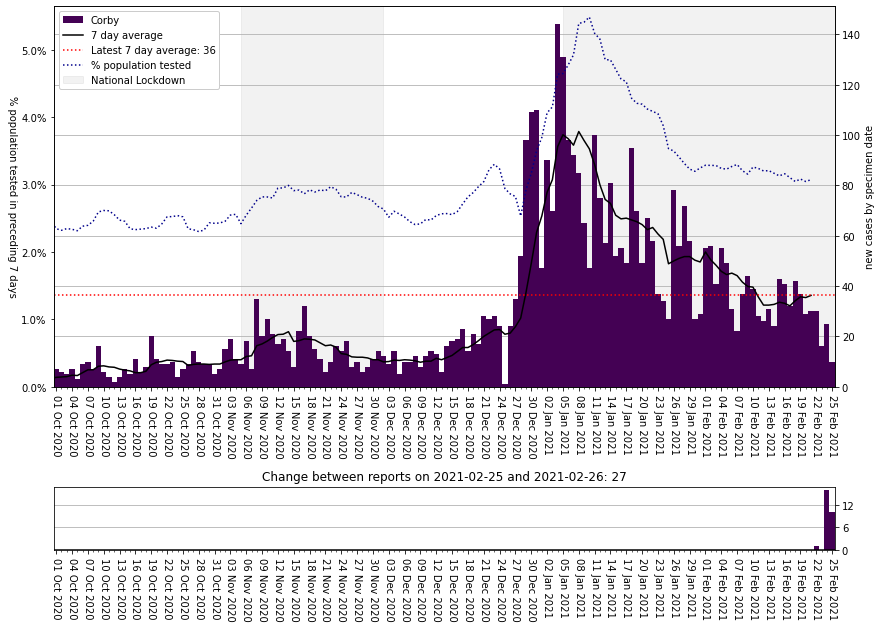

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,120.071885,1371.0,2021-02-25
E08000035,Leeds,121.416297,963.0,2021-02-25
E08000032,Bradford,158.399040,855.0,2021-02-25
S12000049,Glasgow City,117.197372,742.0,2021-02-25
E08000003,Manchester,125.348643,693.0,2021-02-25
E06000016,Leicester,191.122002,677.0,2021-02-25
E08000019,Sheffield,109.087241,638.0,2021-02-25
E08000034,Kirklees,142.796399,628.0,2021-02-25
E08000028,Sandwell,172.020094,565.0,2021-02-25


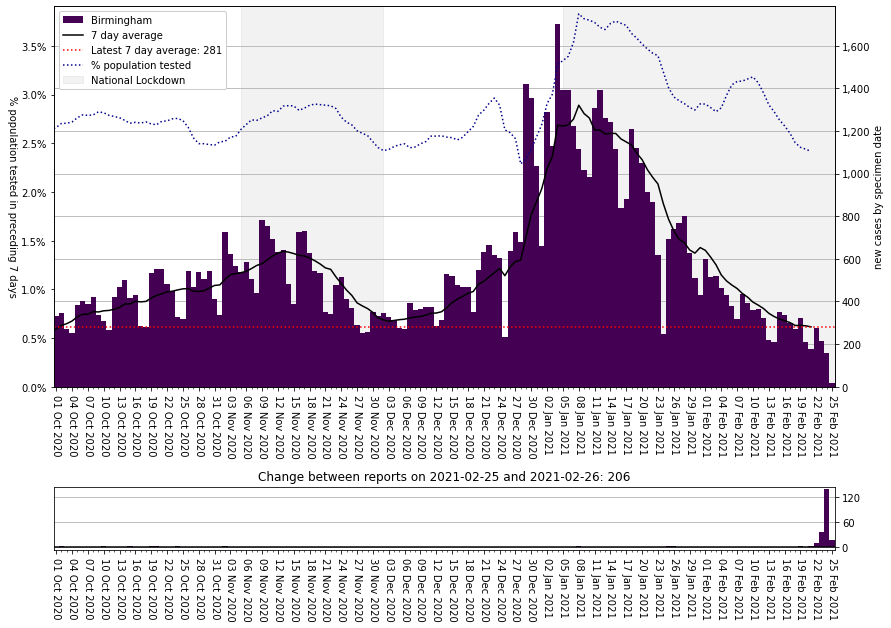

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

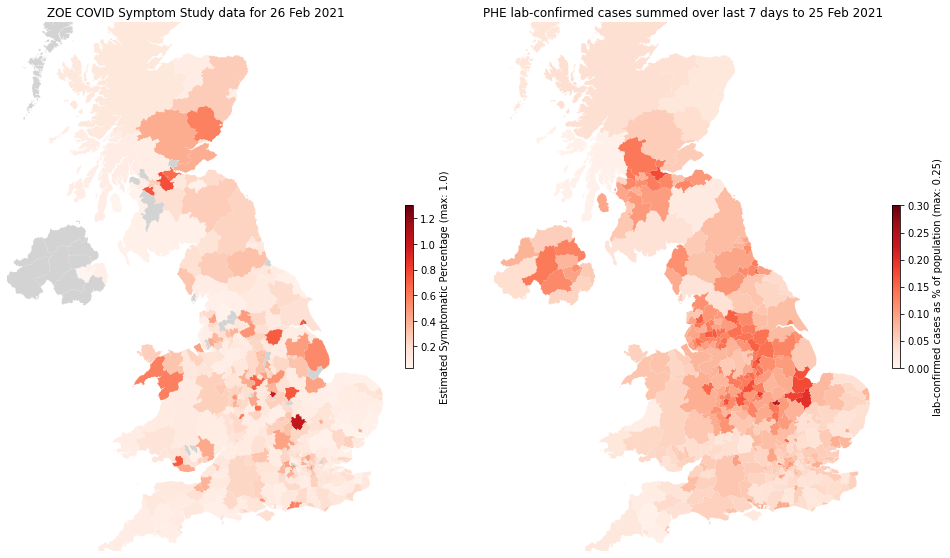

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

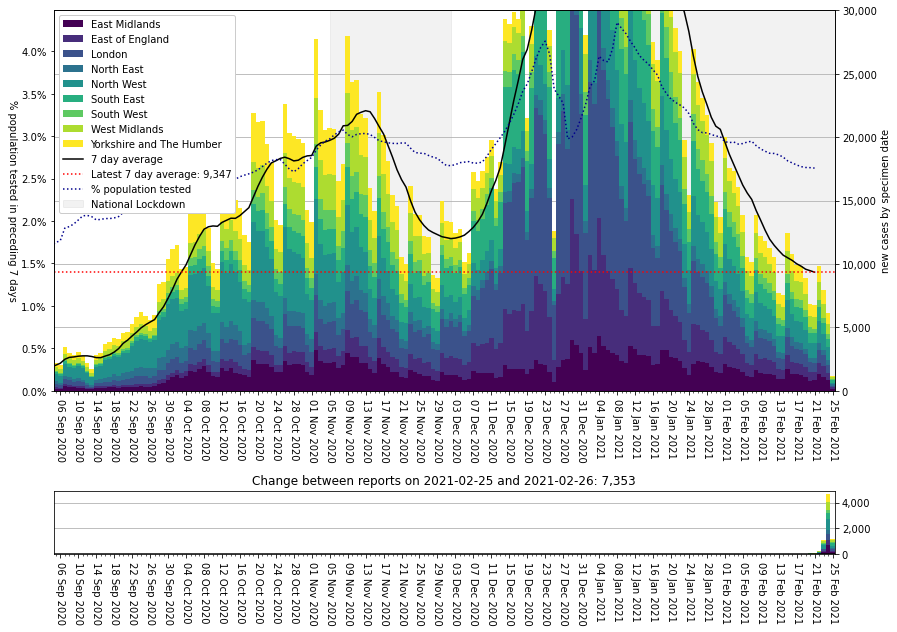

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

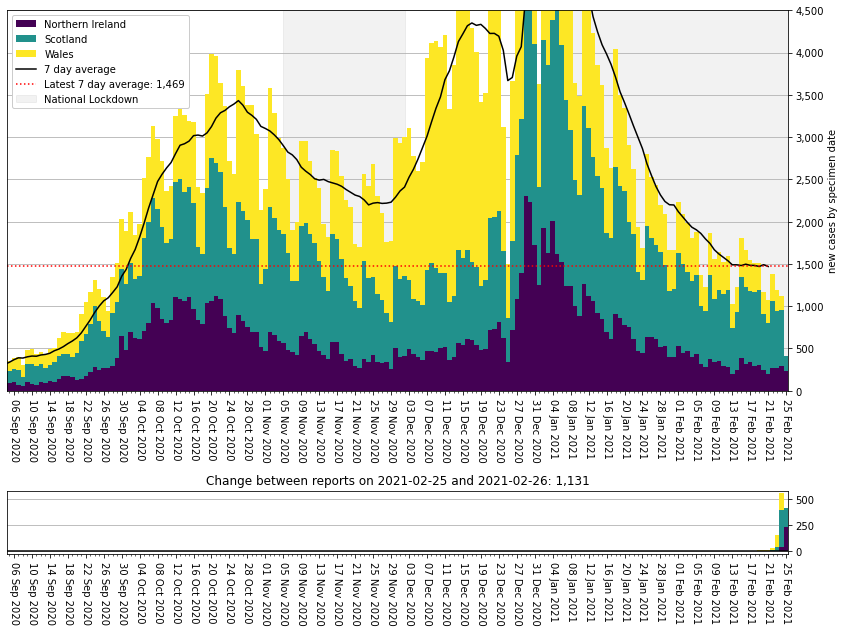

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')